# Getting Data

In [2]:
# load the dataset traffic
from pycaret.datasets import get_data

In [3]:
dataset_traffic = get_data('traffic')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,1,5545
1,None,289.36,0.0,0.0,75,Clouds,0,4516
2,None,289.58,0.0,0.0,90,Clouds,0,4767
3,None,290.13,0.0,0.0,90,Clouds,0,5026
4,None,291.14,0.0,0.0,75,Clouds,0,4918


In [4]:
dataset_traffic.shape

(48204, 8)

In [5]:
dataset_traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,1,3543
48200,None,282.76,0.0,0.0,90,Clouds,0,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,0,2159
48202,None,282.09,0.0,0.0,90,Clouds,0,1450
48203,None,282.12,0.0,0.0,90,Clouds,0,954


Train = used to train the model *fit the model*
Validation = data got from the training set, used to give an estimate of the model while tuning model’s **hyperparameters**.
Test = sample used to provide an unbiased evaluation of a final model fit on the training dataset

Sometimes, people use the term validation and test interchangeably, since it refers to a sample of the dataset held back from training the model.

The evaluation of a model skill on the training dataset would result in a *biased* score. Therefore the model is evaluated on the held-out sample to give an *unbiased* estimate of model skill.

A correct balance of bias and variance is really important when it comes to build a machine learning algorithms that create accurate results from their models.

DOC: https://pycaret.org/train-test-split/

In pycaret: Evaluation of a trained machine learning model and optimization of the hyperparameters is performed using k-fold cross validation on Train dataset only.

Test dataset (also known as hold-out set) is not used in training of models and hence can be used under predict_model function to evaluate metrics and determine if the model has over-fitted the data.

By default, PyCaret uses 70% of the dataset for training, which can be changed using train_size parameter within setup. (This functionality is only available in pycaret.classification and pycaret.regression modules.)

In [11]:
# in first tutorial it was done manually
# just to memorize
data_train = dataset_traffic.sample(frac=0.9, random_state=46)
data_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
41284,None,253.080,0.0,0.0,1,Clear,0,339
31090,None,283.808,0.0,0.0,0,Clear,1,5633
38737,None,271.440,0.0,0.0,90,Clouds,0,899
43924,None,289.510,0.0,0.0,40,Thunderstorm,0,1513
11072,None,255.400,0.0,0.0,64,Clouds,0,3769


In [12]:
data_test = dataset_traffic.drop(data_train.index)
data_test.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
1,None,289.36,0.0,0.0,75,Clouds,0,4516
14,None,285.45,0.0,0.0,1,Clear,0,963
40,None,281.32,0.0,0.0,1,Clear,0,2726
51,None,298.06,0.0,0.0,20,Clouds,0,6292
75,None,280.87,0.0,0.0,90,Clouds,1,5384


In [13]:
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

In [14]:
data_test.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,None,289.36,0.0,0.0,75,Clouds,0,4516
1,None,285.45,0.0,0.0,1,Clear,0,963
2,None,281.32,0.0,0.0,1,Clear,0,2726
3,None,298.06,0.0,0.0,20,Clouds,0,6292
4,None,280.87,0.0,0.0,90,Clouds,1,5384


In [15]:
data_train.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,Rush Hour,traffic_volume
0,None,253.080,0.0,0.0,1,Clear,0,339
1,None,283.808,0.0,0.0,0,Clear,1,5633
2,None,271.440,0.0,0.0,90,Clouds,0,899
3,None,289.510,0.0,0.0,40,Thunderstorm,0,1513
4,None,255.400,0.0,0.0,64,Clouds,0,3769


# Model Training

In [18]:
from pycaret.regression import *

**Assigning Session ID as seed:** session id is a pseudo random number generated by default if no session_id parameter is passed. PyCaret distributes this id as a seed in all the functions to isolate the effect of randomization. This allows for reproducibility at later date in the same or different environment.

**normalize** - normalize: bool, default = False
When set to True, the feature space is transformed using the normalized_method param. Generally, linear algorithms perform better with normalized data however, the results may vary and it is advised to run multiple experiments to evaluate the benefit of normalization.

normalize_method: string, default = ‘zscore’
Defines the method to be used for normalization. By default, normalize method is set to ‘zscore’. The standard zscore is calculated as z = (x – u) / s. The other available options are:

z-score : The standard zscore is calculated as z = (x – u) / s
minmax : scales and translates each feature individually such that it is in the range of 0 – 1.
maxabs : scales and translates each feature individually such that the maximal absolute value of each feature will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.
robust : scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.

DOC: https://pycaret.org/normalization/

In [22]:
# splitting the data into test and train using setup()
# must specify the dataset, the target, i.e, y, and the train_size from 0 to 1
data_train_setup = setup(data=dataset_traffic, target='traffic_volume',train_size=0.9, session_id=170, normalize = True) 

,Description,Value
0,session_id,170
1,Target,traffic_volume
2,Original Data,"(48204, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(43383, 28)"


### These metrics are used to evaluate the model performance in regression analysis:

Useful for numerical values prediction - it's not for categories prediction

- MAE	
- MSE	
- RMSE
- R2
- RMSLE
- MAPE


#### MAE = Mean Absolute Error

This metric measures the average of the absolute residuals in the dataset. Residuals is the difference between the predicted value and the observed/real/actual one. it takes the average as a measurement of the magnitude of errors for the entire group.
MAE can also be referred as L1 loss function.

<img src="https://miro.medium.com/max/630/1*OVlFLnMwHDx08PHzqlBDag.gif">

<img src="https://miro.medium.com/max/374/1*3DI_3QdQgyBWixpRxTgCHQ.png">
          
          
As one of the most commonly used loss functions for regression problems, MAE helps users to formulate learning problems into optimization problems. It also serves as an easy-to-understand quantifiable measurement of errors for regression problems.

#### MSE = Mean Squared Error

Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

<img src="https://miro.medium.com/max/266/1*1TV6T6hNP-iwJrtvfsvCRQ.png">


#### RMSE = Root Mean Squared Error

it's the square root of Mean Squared error. It measures the standard deviation of residuals.,


<img src="https://miro.medium.com/max/425/1*usaMSyi6jUT3f2bOMyiYdA.png">

#### R2 = coefficient of determination

The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second. 

#### RMSLE - Root Mean Squared Logaritmic Error

#### MAPE - mean absolute percentage error


In [23]:
best_model_traffic = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1505,3.084e+06,1756,0.219,0.9321,2.595,0.73
gbr,Gradient Boosting Regressor,1534,3.162e+06,1778,0.1994,0.9447,2.665,1.837
ada,AdaBoost Regressor,1579,3.291e+06,1814,0.1668,0.9758,2.804,1.184
lasso,Lasso Regression,1596,3.356e+06,1832,0.1503,0.9669,2.796,0.062
omp,Orthogonal Matching Pursuit,1617,3.435e+06,1853,0.1304,0.9778,2.845,0.043
par,Passive Aggressive Regressor,1593,3.438e+06,1854,0.1293,0.9494,2.706,0.128
llar,Lasso Least Angle Regression,1639,3.498e+06,1870,0.1142,0.9935,2.841,0.055
knn,K Neighbors Regressor,1567,3.63e+06,1905,0.0809,0.9591,2.657,6.662
en,Elastic Net,1670,3.636e+06,1907,0.0793,1.009,2.96,0.064
rf,Random Forest Regressor,1520,3.638e+06,1907,0.0788,0.9455,2.436,6.636


In [ ]:
# return best model based on MAPE
best = compare_models(sort = 'MAPE') #default is 'R2'

In [ ]:
# compare specific models
best_specific = compare_models(include = ['dt','rf','xgboost'])

In [ ]:
# blacklist certain models
best_specific = compare_models(exclude = ['catboost', 'svm'])

Up until PyCaret 2.1, the only way you can tune the hyperparameters of your model in PyCaret was by using the Random Grid Search from scikit-learn. New methods added in 2.2 are:
- scikit-learn (grid)
- scikit-optimize (bayesian)
- tune-sklearn (random, grid, bayesian, hyperopt, bohb)
- optuna (random, tpe)

to use new parameters ‘search_library’ and ‘search_algorithm’ were added.


In [24]:
# # tune hyperparameters with scikit-learn (default)
tuned_model = tune_model(best_model_traffic) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1505,3.091e+06,1758,0.2192,0.9451,2.507
1,1510,3.112e+06,1764,0.2104,0.9225,3.366
2,1495,3.077e+06,1754,0.2277,0.9232,1.806
3,1497,3.07e+06,1752,0.213,0.9186,2.673
4,1503,3.092e+06,1759,0.2262,0.9536,3.816
5,1509,3.093e+06,1759,0.2288,0.9297,3.217
6,1502,3.084e+06,1756,0.2108,0.9259,2.232
7,1500,3.08e+06,1755,0.2201,0.942,2.876
8,1504,3.109e+06,1763,0.2083,0.9276,1.833
9,1510,3.098e+06,1760,0.2092,0.9224,1.795


In [29]:
# tune hyperparameters with scikit-optimize
tuned_bayesian = tune_model(best_model_traffic, search_library = 'scikit-optimize')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1583,3.277e+06,1810,0.1724,0.9831,2.733
1,1582,3.277e+06,1810,0.1686,0.9612,3.465
2,1585,3.29e+06,1814,0.1743,0.9672,1.987
3,1572,3.241e+06,1800,0.1693,0.9611,2.854
4,1585,3.303e+06,1817,0.1736,0.9979,3.89
5,1599,3.31e+06,1819,0.1746,0.9751,3.279
6,1579,3.263e+06,1806,0.165,0.968,2.512
7,1578,3.274e+06,1809,0.1709,0.9857,2.992
8,1580,3.278e+06,1811,0.1654,0.9692,2.013
9,1580,3.27e+06,1808,0.1652,0.965,2.015


In [38]:
# return top 3 models based on 'Accuracy'
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1505,3.084e+06,1756,0.219,0.9321,2.595,0.427
gbr,Gradient Boosting Regressor,1534,3.162e+06,1778,0.1994,0.9447,2.665,1.858
ada,AdaBoost Regressor,1579,3.291e+06,1814,0.1668,0.9758,2.804,0.982
lasso,Lasso Regression,1596,3.356e+06,1832,0.1503,0.9669,2.796,0.072
omp,Orthogonal Matching Pursuit,1617,3.435e+06,1853,0.1304,0.9778,2.845,0.039
par,Passive Aggressive Regressor,1593,3.438e+06,1854,0.1293,0.9494,2.706,0.114
llar,Lasso Least Angle Regression,1639,3.498e+06,1870,0.1142,0.9935,2.841,0.039
knn,K Neighbors Regressor,1567,3.63e+06,1905,0.0809,0.9591,2.657,6.434
en,Elastic Net,1670,3.636e+06,1907,0.0793,1.009,2.96,0.064
rf,Random Forest Regressor,1520,3.638e+06,1907,0.0788,0.9455,2.436,6.519


In [40]:
# tune multiple models dynamically
tuned_top3 = [tune_model(i, fold=8) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1557,3.262e+06,1806,0.1753,0.9579,2.469
1,1551,3.246e+06,1802,0.1731,0.9478,3.359
2,1557,3.251e+06,1803,0.186,0.9571,2.249
3,1556,3.262e+06,1806,0.1746,0.9667,3.419
4,1579,3.329e+06,1825,0.1695,0.9604,2.918
5,1538,3.173e+06,1781,0.1849,0.9458,3.14
6,1560,3.278e+06,1811,0.1719,0.9567,1.859
7,1567,3.278e+06,1811,0.161,0.9568,2.151
Mean,1558,3.26e+06,1805,0.1746,0.9562,2.695
SD,10.98,4.077e+04,11.31,0.0076,0.0062,0.5544


# Model Analysis

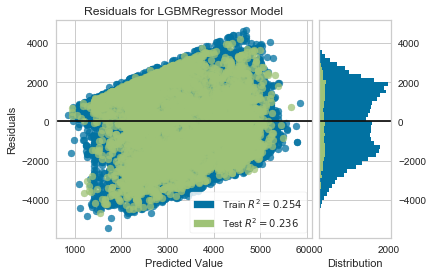

In [42]:
plot_model(tuned_model)

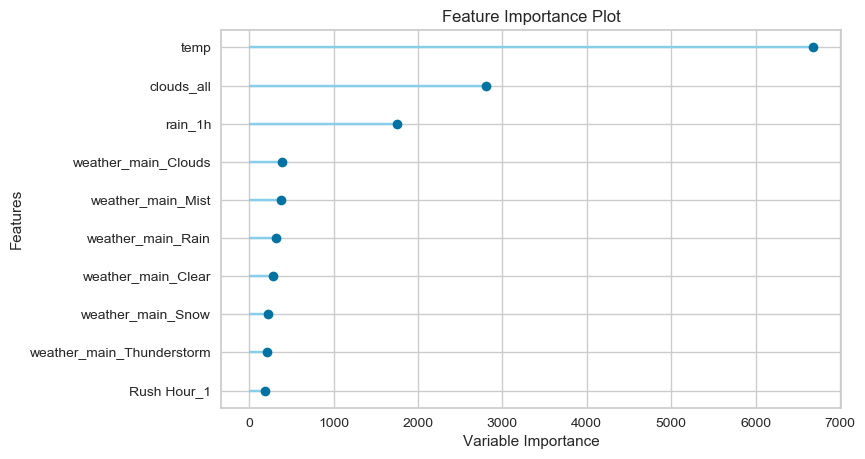

In [43]:
plot_model(tuned_model, plot='feature')

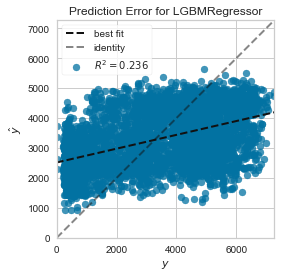

In [44]:
plot_model(tuned_model, plot='error')

# Model Deployment

In [48]:
pred = predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1476,2.996e+06,1731,0.2357,0.8917,1.591


In [ ]:
pre.head()